# Importing Liberaries

In [1]:
# for exporatory data analysis
import pandas as pd
import numpy as np

# for data gathering through sql
import sqlalchemy as sa
import pymysql

# for visualition purpose
import matplotlib.pyplot as plt
import seaborn as sns

# For feature Selection using Variance Inflation Factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# For feature Selection using ANNOVA
from sklearn.feature_selection import f_classif

# For Feature Selection Information Gain
from sklearn.feature_selection import mutual_info_regression

# For ordinal encoding
from sklearn.preprocessing import OrdinalEncoder


from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.neighbors import KNeighborsRegressor


# For model instance
from sklearn.tree import DecisionTreeRegressor

# for ensambling
from sklearn.ensemble import RandomForestRegressor


# Problem Statment

    Begin our statement with the ideal situation  and we will describe the ideal outcome. 
The goal of this analysis is to predict campaign cost of promotions run by Media in the Australia (as per the details of the dataset). 
That is, given historical information about past campaigns can we use machine learning to estimate a budget for future campaigns of this type. 
Each row represents a customer, and the cost variable basically represents the cost of media campaigns to acquire each customer.


Types of problem :- Regression


# Data Gathering

In [65]:
df=pd.read_csv("media prediction and its cost.csv")
df

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


## Exploratory Data Analysis

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [67]:
x=df.drop("cost",axis=1)
y=df["cost"]

def exploratory_data_analysis(x):
    for i in x.columns:
        print("*"*80)
        print()
        print("-"*20,"> ","Feature Name : ",f"{i}"," <","-"*20)
        
        print(f"Datatype of {i} column is : ",df[f"{i}"].dtype)
        
        print("Null Values Count in this column: ",df[f"{i}"].isna().sum())
        print()
        print("*"*80)
        print()
exploratory_data_analysis(x) 

********************************************************************************

-------------------- >  Feature Name :  food_category  < --------------------
Datatype of food_category column is :  object
Null Values Count in this column:  0

********************************************************************************

********************************************************************************

-------------------- >  Feature Name :  food_department  < --------------------
Datatype of food_department column is :  object
Null Values Count in this column:  0

********************************************************************************

********************************************************************************

-------------------- >  Feature Name :  food_family  < --------------------
Datatype of food_family column is :  object
Null Values Count in this column:  0

********************************************************************************

**********************

features which is having object datatype we have to make encoding of that columns. 
But befor that we have to choose most important features  which are more cotriute its contributions for prediction.
which can be carried out by Feature selection.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

# Feature Engineering

In [69]:
df_cat=df[["food_category","food_department","food_family",
                      "promotion_name","sales_country","marital_status", 
                      "gender","education","member_card","occupation","houseowner", 
                      "avg. yearly_income","brand_name","store_type","store_city","store_state","media_type"]]
df_cat

,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
0,Breakfast Foods,Frozen Foods,Food,Bag Stuffers,USA,M,F,Partial High School,Normal,Skilled Manual,Y,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery,USA,M,M,Bachelors Degree,Silver,Professional,Y,$50K - $70K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,Breakfast Foods,Frozen Foods,Food,High Roller Savings,USA,S,F,Partial High School,Normal,Manual,N,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
3,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery,USA,M,F,High School Degree,Bronze,Manual,Y,$30K - $50K,Carrington,Deluxe Supermarket,Salem,OR,In-Store Coupon
4,Breakfast Foods,Frozen Foods,Food,Double Down Sale,USA,M,M,Partial High School,Bronze,Skilled Manual,N,$30K - $50K,Golden,Deluxe Supermarket,Salem,OR,Radio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,You Save Days,USA,M,F,Partial High School,Normal,Skilled Manual,Y,$10K - $30K,ADJ,Small Grocery,San Francisco,CA,In-Store Coupon
60424,Specialty,Carousel,Non-Consumable,Price Cutters,USA,S,F,High School Degree,Bronze,Skilled Manual,N,$30K - $50K,Symphony,Small Grocery,San Francisco,CA,Sunday Paper
60425,Specialty,Carousel,Non-Consumable,Weekend Markdown,USA,M,M,High School Degree,Bronze,Manual,Y,$30K - $50K,ADJ,Small Grocery,San Francisco,CA,"Sunday Paper, Radio, TV"
60426,Specialty,Carousel,Non-Consumable,Sales Days,Canada,S,M,Bachelors Degree,Bronze,Professional,N,$70K - $90K,ADJ,Mid-Size Grocery,Victoria,BC,Sunday Paper


In [70]:
def Cat_column_check(x):
    for i in x.columns:
        print("*"*80)
        print()
        print("-"*20,"> ","Feature Name : ",f"{i}"," <","-"*20)
        print()
        print()
        print(f"Datatype of {i} column is : ",df[f"{i}"].dtype)
        print()
        print()
        print(df[f"{i}"].nunique())
        
        print(df[f"{i}"].unique())
        print()
        print()
        print(df[f"{i}"].value_counts())
        print()
        print("*"*80)
        print()
Cat_column_check(df_cat) 

********************************************************************************

-------------------- >  Feature Name :  food_category  < --------------------


Datatype of food_category column is :  object


45
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']


Vegetables              7440
Snack Foods             6919
Dairy                   3835
Meat                    3107


-------------------- >  Feature Name :  houseowner  < --------------------


Datatype of houseowner column is :  object


2
['Y' 'N']


Y    36510
N    23918
Name: houseowner, dtype: int64

********************************************************************************

********************************************************************************

-------------------- >  Feature Name :  avg. yearly_income  < --------------------


Datatype of avg. yearly_income column is :  object


8
['$10K - $30K' '$50K - $70K' '$30K - $50K' '$70K - $90K' '$110K - $130K'
 '$130K - $150K' '$150K +' '$90K - $110K']


$30K - $50K      19514
$10K - $30K      12959
$50K - $70K      10493
$70K - $90K       7544
$130K - $150K     3410
$90K - $110K      2737
$110K - $130K     2590
$150K +           1181
Name: avg. yearly_income, dtype: int64

********************************************************************************

********************************************************************************



## Removing Duplicates

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

### avg_cars_at home(approx), avg_cars_at home(approx).1

avg_cars_at home(approx), avg_cars_at home(approx).1 these two columns are duplicates
so we will drop either of them

In [72]:
df.iloc[:,8:12]

,marital_status,gender,total_children,education
0,M,F,1.0,Partial High School
1,M,M,0.0,Bachelors Degree
2,S,F,4.0,Partial High School
3,M,F,2.0,High School Degree
4,M,M,0.0,Partial High School
...,...,...,...,...
60423,M,F,1.0,Partial High School
60424,S,F,2.0,High School Degree
60425,M,M,1.0,High School Degree
60426,S,M,2.0,Bachelors Degree


In [73]:
df=df.drop(columns=["avg_cars_at home(approx).1"],axis=1)

## Encoding

### Label Encoding

### education, member_card, gender, salary, marital_status, store_type

We can make label encoding on salary, gender, education, member_card.

In [74]:
df["education"].replace({"Partial High School":0,"High School Degree":1,
                         "Partial College":2,"Bachelors Degree":3,"Graduate Degree":4},inplace=True)
df["member_card"].replace({"Normal":0,"Bronze":1,"Silver":2,"Golden":3},inplace=True)
df["gender"].replace({"F":1,"M":0},inplace=True)
df["marital_status"].replace({"S":0,"M":1},inplace=True)
df["store_type"].replace({"Small Grocery":0,"Mid-Size Grocery":1,"Supermarket":3,"Deluxe Supermarket":2,"Gourmet Supermarket":2},inplace=True)
df["occupation"].replace({"Manual":0,"Skilled Manual":1,"Clerical":2,"Management":3,"Professional":4},inplace=True)

In [75]:
education_dict={"Partial High School":0,"High School Degree":1,
                         "Partial College":2,"Bachelors Degree":3,"Graduate Degree":4}
member_card_dict={"Normal":0,"Bronze":1,"Silver":2,"Golden":3}
gender_dict={"F":1,"M":0}
marital_status_dict={"S":0,"M":1}
store_type_dict={"Small Grocery":0,"Mid-Size Grocery":1,"Supermarket":3,"Deluxe Supermarket":4,"Gourmet Supermarket":2}
occupation_dict={"Manual":0,"Skilled Manual":1,"Clerical":2,"Management":3,"Professional":4}

In [76]:
df["avg. yearly_income"].replace({'$30K - $50K': 40,'$10K - $30K': 20,'$50K - $70K': 60,'$70K - $90K': 80,
                                  '$130K - $150K': 140,'$90K - $110K': 100,
                                  '$110K - $130K': 120,'$150K +': 150},inplace=True)
df["avg. yearly_income"].value_counts()

40     19514
20     12959
60     10493
80      7544
140     3410
100     2737
120     2590
150     1181
Name: avg. yearly_income, dtype: int64

In [77]:
df4=df

## Ordinal Encoding

In [78]:
df_ordinal=df

### media_type

In [17]:
df_ordinal["media_type"].unique()

array(['Daily Paper, Radio', 'In-Store Coupon', 'Radio', 'Daily Paper',
       'Product Attachment', 'Sunday Paper, Radio',
       'Sunday Paper, Radio, TV', 'Sunday Paper', 'Street Handout', 'TV',
       'Bulk Mail', 'Cash Register Handout', 'Daily Paper, Radio, TV'],
      dtype=object)

In [18]:
df_ordinal["media_type"].unique().tolist()

['Daily Paper, Radio',
 'In-Store Coupon',
 'Radio',
 'Daily Paper',
 'Product Attachment',
 'Sunday Paper, Radio',
 'Sunday Paper, Radio, TV',
 'Sunday Paper',
 'Street Handout',
 'TV',
 'Bulk Mail',
 'Cash Register Handout',
 'Daily Paper, Radio, TV']

In [19]:
lst_media_type_columns=[]
for i in df_ordinal["media_type"].unique().tolist():
    if " "in i:
        a=i.replace(" ","_")
        lst_media_type_columns.append(a)
    else:
        lst_media_type_columns.append(i)
print(lst_media_type_columns)

['Daily_Paper,_Radio', 'In-Store_Coupon', 'Radio', 'Daily_Paper', 'Product_Attachment', 'Sunday_Paper,_Radio', 'Sunday_Paper,_Radio,_TV', 'Sunday_Paper', 'Street_Handout', 'TV', 'Bulk_Mail', 'Cash_Register_Handout', 'Daily_Paper,_Radio,_TV']


In [20]:
# lst=['Daily_Paper,_Radio', 'In-Store_Coupon', 'Radio', 'Daily_Paper',
#        'Product_Attachment', 'Sunday_Paper,_Radio',
#        'Sunday_Paper,_Radio,_TV', 'Sunday_Paper', 'Street_Handout', 'TV',
#        'Bulk_Mail', 'Cash_Register_Handout', 'Daily_Paper,_Radio,_TV']

In [21]:
m=1
dict01={}
for i in df_ordinal["media_type"].unique():
    n=1
    for j in lst_media_type_columns:
        if m==n:
            dict02={f"{i}":j}
            dict01.update(dict02)
            dict02.clear()
        n=n+1
    m=m+1
        
print(dict01)

{'Daily Paper, Radio': 'Daily_Paper,_Radio', 'In-Store Coupon': 'In-Store_Coupon', 'Radio': 'Radio', 'Daily Paper': 'Daily_Paper', 'Product Attachment': 'Product_Attachment', 'Sunday Paper, Radio': 'Sunday_Paper,_Radio', 'Sunday Paper, Radio, TV': 'Sunday_Paper,_Radio,_TV', 'Sunday Paper': 'Sunday_Paper', 'Street Handout': 'Street_Handout', 'TV': 'TV', 'Bulk Mail': 'Bulk_Mail', 'Cash Register Handout': 'Cash_Register_Handout', 'Daily Paper, Radio, TV': 'Daily_Paper,_Radio,_TV'}


In [22]:
df_ordinal["media_type"].replace(dict01,inplace=True)

In [23]:
df_ordinal["media_type"].unique()

array(['Daily_Paper,_Radio', 'In-Store_Coupon', 'Radio', 'Daily_Paper',
       'Product_Attachment', 'Sunday_Paper,_Radio',
       'Sunday_Paper,_Radio,_TV', 'Sunday_Paper', 'Street_Handout', 'TV',
       'Bulk_Mail', 'Cash_Register_Handout', 'Daily_Paper,_Radio,_TV'],
      dtype=object)

In [24]:
cat_column=["food_department","food_category", "food_family","promotion_name","sales_country",
            "store_state","store_city","houseowner","brand_name","media_type"]
enc_ordinal=OrdinalEncoder()
enc_ordinal.fit(df_ordinal[cat_column])
df_ordinal[cat_column] = enc_ordinal.transform(df_ordinal[cat_column])

In [25]:
df_ordinal.info(memory_usage='deep',verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  float64
 1   food_department           60428 non-null  float64
 2   food_family               60428 non-null  float64
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  float64
 7   sales_country             60428 non-null  float64
 8   marital_status            60428 non-null  int64  
 9   gender                    60428 non-null  int64  
 10  total_children            60428 non-null  float64
 11  education                 60428 non-null  int64  
 12  member_card               60428 non-null  int64  
 13  occupation                60428 non-null  int64  
 14  houseo

# Feature Selection

### Embeded Method [Random Forest Feature Importance] on df_ordinal

In [26]:
x_for_enc_o=df_ordinal.drop("cost",axis=1)
y=df_ordinal["cost"]
rf_model_for_enc_o=RandomForestRegressor()
rf_model_for_enc_o.fit(x_for_enc_o,y)
s_feature_imp_ord=pd.Series(rf_model_for_enc_o.feature_importances_,index=x_for_enc_o.columns)

<AxesSubplot:>

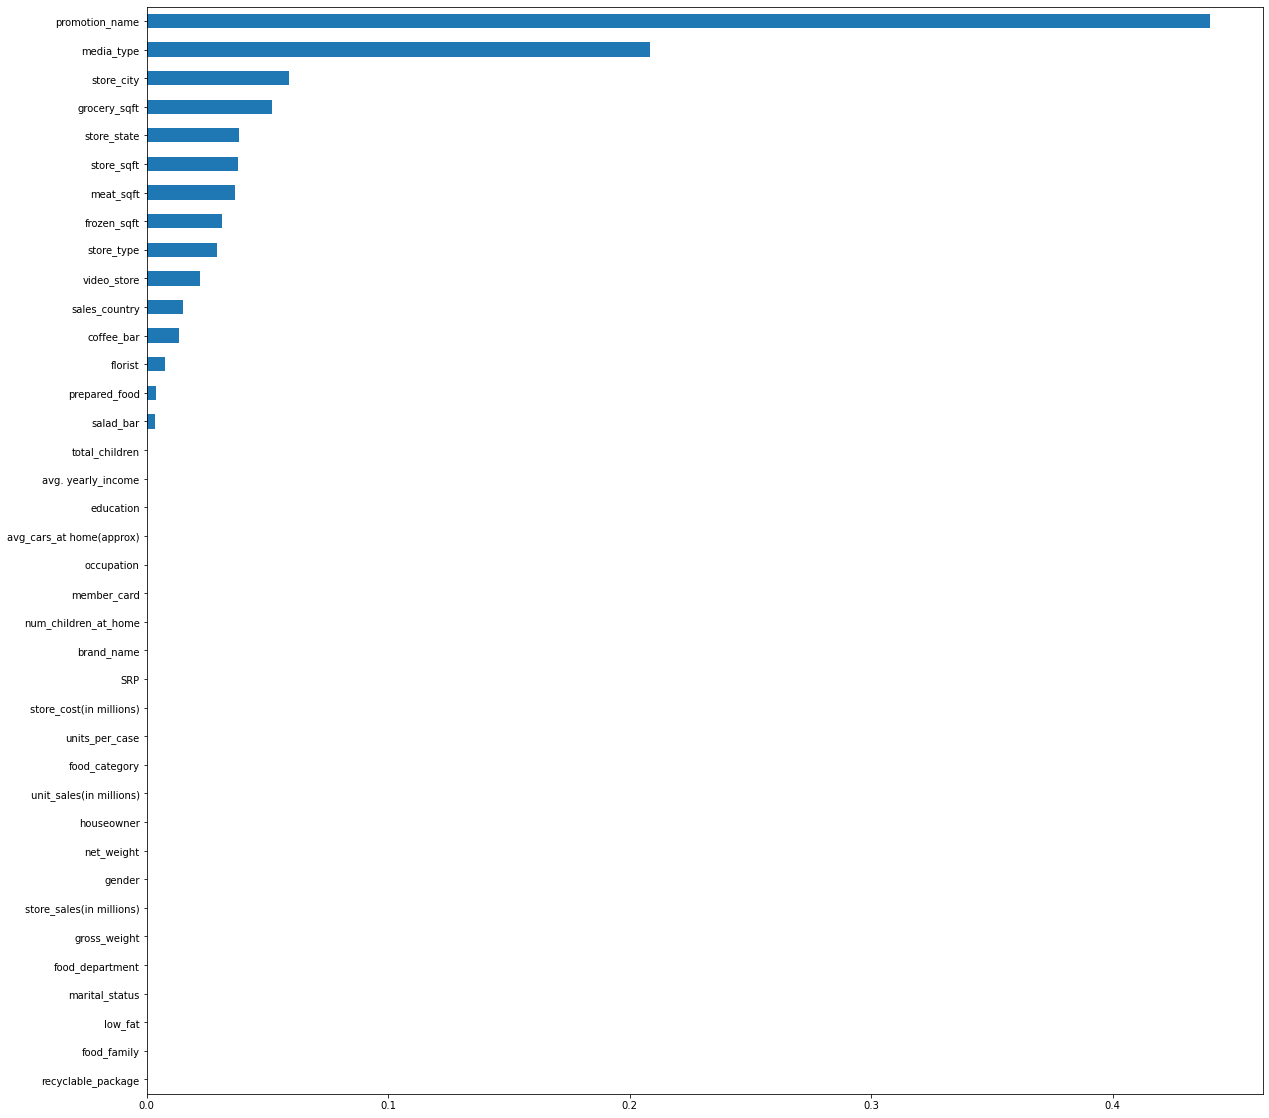

In [27]:
plt.figure(figsize=(20,20))
s_feature_imp_ord.sort_values().plot(kind="barh")

In [28]:
less_imp_feature_by_rffeature_imp=["total_children","education","avg_cars_at home(approx)","occupation","member_card","brand_name",
                   "num_children_at_home","SRP","store_cost(in millions)","gender","food_category",
                  "units_per_case","store_sales(in millions)","net_weight","houseowner","gross_weight","unit_sales(in millions)",
                  "food_department","marital_status","low_fat","recyclable_package","food_family"]

In [29]:
x_ONLY_enc_o=df_ordinal[cat_column]

y=df_ordinal["cost"]
rf_model_enc_o=RandomForestRegressor()
rf_model_enc_o.fit(x_ONLY_enc_o,y)
s_feature_imp_ord=pd.Series(rf_model_enc_o.feature_importances_,index=x_ONLY_enc_o.columns)

<AxesSubplot:>

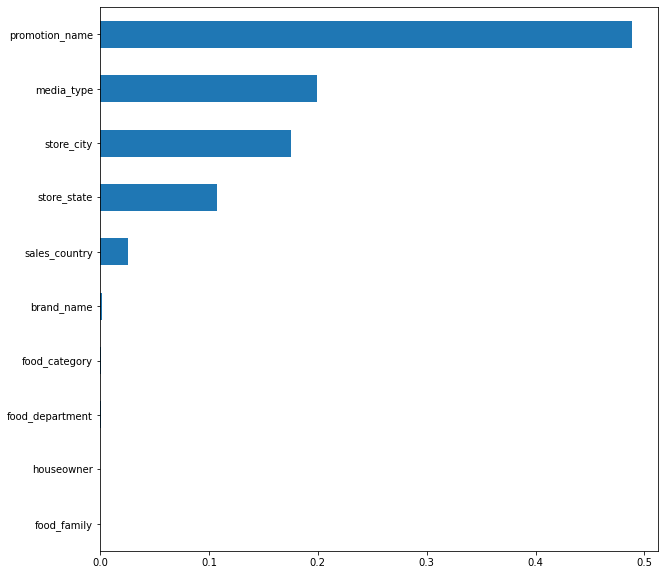

In [30]:
plt.figure(figsize=(10,10))
s_feature_imp_ord.sort_values().plot(kind="barh")

From above Random Forest Feature Importace, 
we know that brand_name, food_category, food_department, houseowner, food_family 
these feature importance having less importance

### Embeded Method [Decision Tree Feature Importance] on df_ordinal

In [31]:
DT_model_for_enc_o=DecisionTreeRegressor()
DT_model_for_enc_o.fit(x_for_enc_o,y)
s_feature_imp_ord=pd.Series(DT_model_for_enc_o.feature_importances_,index=x_for_enc_o.columns)

<AxesSubplot:>

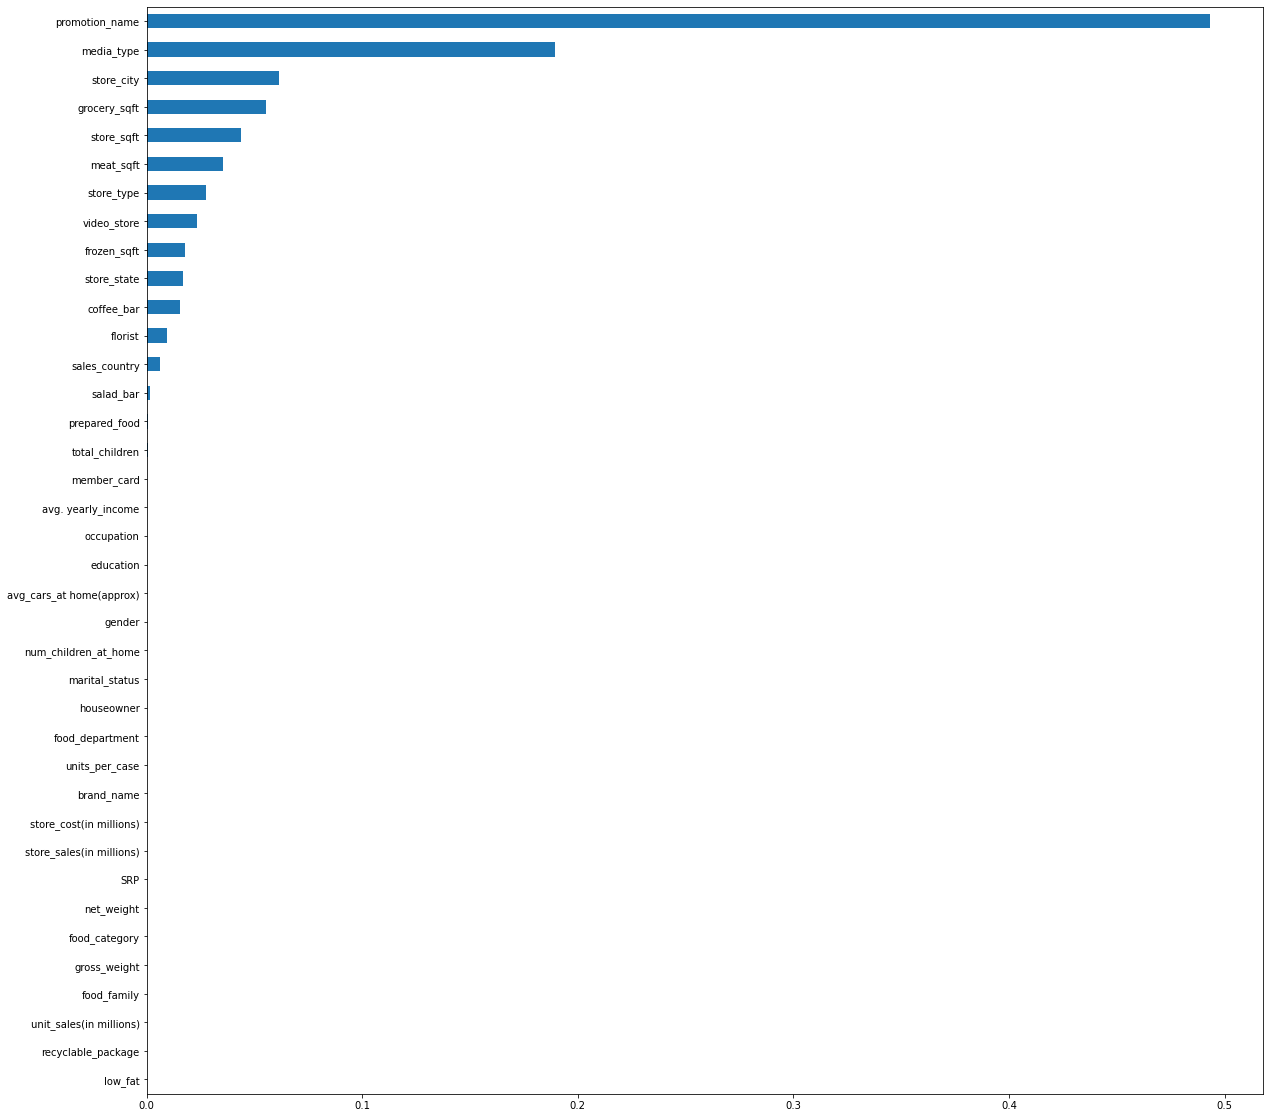

In [32]:
plt.figure(figsize=(20,20))
s_feature_imp_ord.sort_values().plot(kind="barh")

In [33]:
less_imp_feature_by_DTfeature_imp=["total_children","education","avg_cars_at home(approx)","occupation","member_card","brand_name",
                   "num_children_at_home","SRP","store_cost(in millions)","gender","food_category",
                  "units_per_case","store_sales(in millions)","net_weight","houseowner","gross_weight","unit_sales(in millions)",
                  "food_department","marital_status","low_fat","recyclable_package","food_family"]

## 3 ANNOVA

In [34]:
f_val, p_val = f_classif(x_for_enc_o, y)

df_annova = pd.DataFrame({"f_val":f_val, "p_val":np.around(p_val,5)},index=x_for_enc_o.columns)
df_annova

,f_val,p_val
food_category,1.112433,0.07947
food_department,1.017728,0.40108
food_family,1.017172,0.40379
store_sales(in millions),6.018778,0.00000
store_cost(in millions),5.479765,0.00000
unit_sales(in millions),21.813001,0.00000
promotion_name,420087.824768,0.00000
sales_country,22266.280974,0.00000
marital_status,6.066118,0.00000
gender,6.649698,0.00000


In [35]:
less_imp_feature_by_annova=["recyclable_package","units_per_case"]

## 2. Information gain Feature Selection

In [36]:
x_for_enc_o=df_ordinal.drop("cost",axis=1)
y=df_ordinal["cost"]
array = mutual_info_regression(x_for_enc_o,y)

Series_mutual_info_gain = pd.Series(array, index=x_for_enc_o.columns)
Series_mutual_info_gain

food_category               0.000000
food_department             0.000000
food_family                 0.003818
store_sales(in millions)    0.001104
store_cost(in millions)     0.002675
unit_sales(in millions)     0.073736
promotion_name              3.771730
sales_country               0.818098
marital_status              0.014106
gender                      0.010759
total_children              0.070050
education                   0.053300
member_card                 0.041263
occupation                  0.057929
houseowner                  0.009610
avg_cars_at home(approx)    0.062356
avg. yearly_income          0.097585
num_children_at_home        0.072359
brand_name                  0.000000
SRP                         0.000000
gross_weight                0.000000
net_weight                  0.000000
recyclable_package          0.000000
low_fat                     0.003685
units_per_case              0.000000
store_type                  0.895889
store_city                  2.713986
s

<AxesSubplot:>

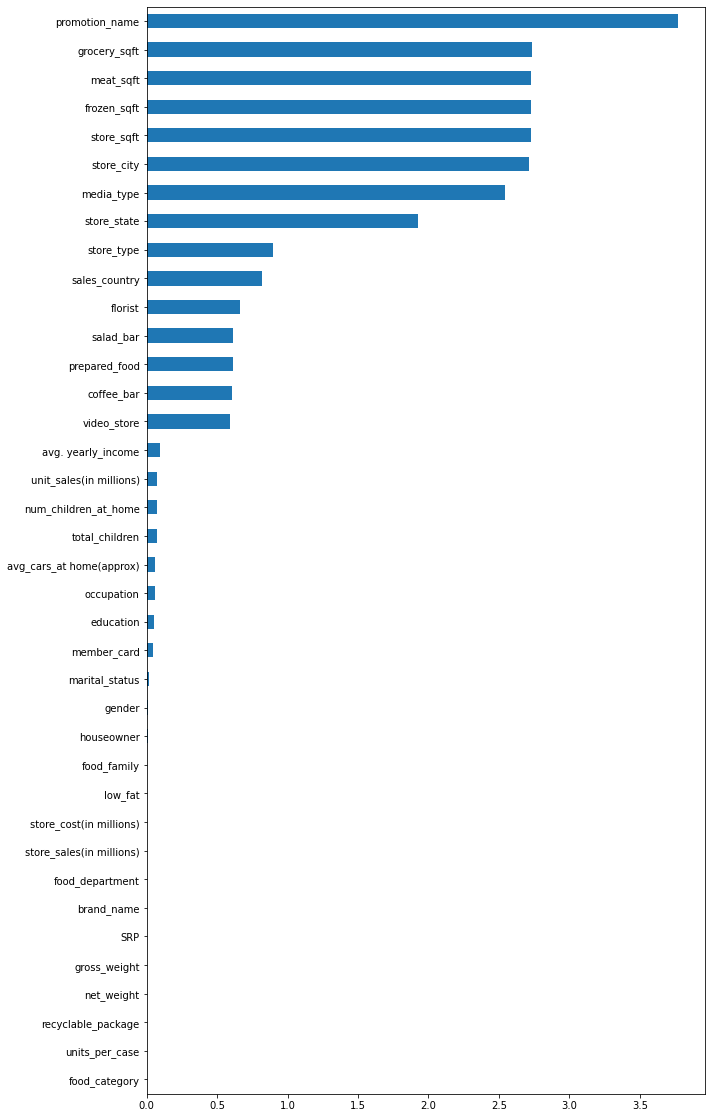

In [37]:
plt.figure(figsize=(10,20))
Series_mutual_info_gain.sort_values().plot(kind= 'barh')

In [38]:
less_imp_feature_by_IG_gain=["brand_name","SRP","store_cost(in millions)","food_category",
                  "units_per_case","store_sales(in millions)","net_weight","gross_weight",
                  "food_department","low_fat","recyclable_package","food_family"]

### Filter Method

### 1  Coefficient Of Corelation
1.1 Pearson Coefficient Of Corelation

Here we will not consider encoded columns

In [39]:
df_without_enc_col=df_ordinal[["store_sales(in millions)","store_cost(in millions)","unit_sales(in millions)","total_children",
                     "avg_cars_at home(approx)","num_children_at_home","SRP","gross_weight","net_weight", 
                      "recyclable_package", "low_fat", "units_per_case","store_sqft","grocery_sqft",
                      "frozen_sqft","meat_sqft","coffee_bar","video_store","salad_bar","prepared_food","florist","cost"]]
x_without_enc_col=df_without_enc_col.iloc[:,:-1]
y_without_enc_col=df_without_enc_col.iloc[:,-1:]
#y_without_enc_col

In [40]:
#Corelation Between Independent Features and Dependent Features.
corr_df=df_without_enc_col.corr().iloc[:,:-1].tail(1).T
corr_df.sort_values("cost")

,cost
video_store,-0.111214
salad_bar,-0.095596
prepared_food,-0.095596
florist,-0.087340
coffee_bar,-0.060859
frozen_sqft,-0.047971
meat_sqft,-0.047962
store_sqft,-0.039656
grocery_sqft,-0.025108
unit_sales(in millions),-0.015015


#### Using Heatmap

<AxesSubplot:>

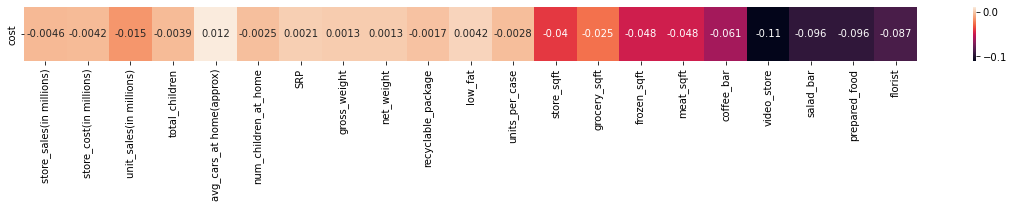

In [41]:
plt.figure(figsize=(20,1))
sns.heatmap(df_without_enc_col.corr().iloc[:,:-1].tail(1), annot=True)

### 1.2 Spearman Coefficient Of Corelation

In [42]:
df_without_enc_col.corr("spearman").iloc[:,:-1].tail(1)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,...,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
cost,-0.007317,-0.007402,-0.014185,-0.003614,0.009466,-0.003305,0.001921,0.00153,0.001518,-0.0015,...,-0.002649,-0.043209,-0.030289,-0.075364,-0.075364,-0.05797,-0.109857,-0.090645,-0.090645,-0.083683


#### Using Heatmap

<AxesSubplot:>

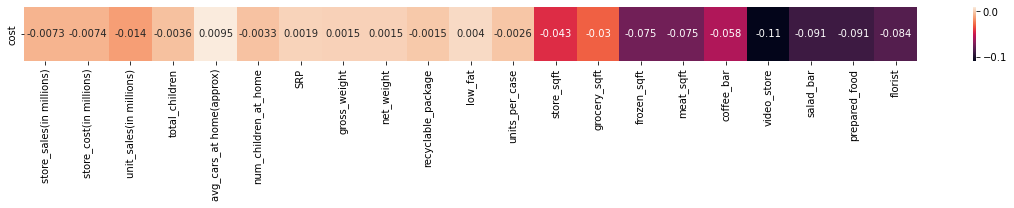

In [43]:
plt.figure(figsize=(20,1))
sns.heatmap(df_without_enc_col.corr("spearman").iloc[:,:-1].tail(1), annot=True)

### 1.3 Kendall Coefficient Of Corelation

In [44]:
df_without_enc_col.corr("kendall").iloc[:,:-1].tail(1)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,...,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
cost,-0.004897,-0.004955,-0.010828,-0.002586,0.007075,-0.002543,0.001289,0.001023,0.001012,-0.001228,...,-0.001804,-0.028274,-0.018307,-0.053951,-0.053951,-0.047447,-0.089916,-0.074191,-0.074191,-0.068493


#### Using Heatmap

<AxesSubplot:>

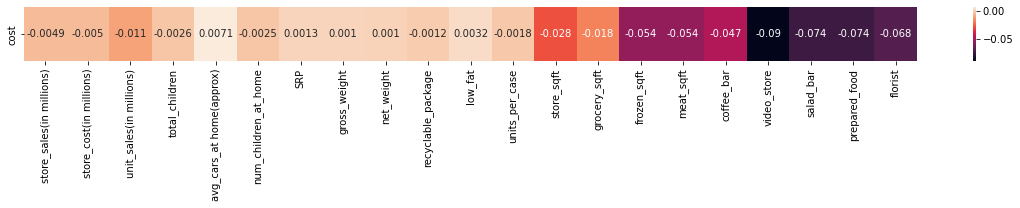

In [45]:
plt.figure(figsize=(20,1))
sns.heatmap(df_without_enc_col.corr("kendall").iloc[:,:-1].tail(1), annot=True)

## 2. Variance Inflation Factor

In [46]:
vif_list=[]

for i in range(x_for_enc_o.shape[1]):
    vif=variance_inflation_factor(x_for_enc_o.values,i)
    vif_list.append(vif)

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

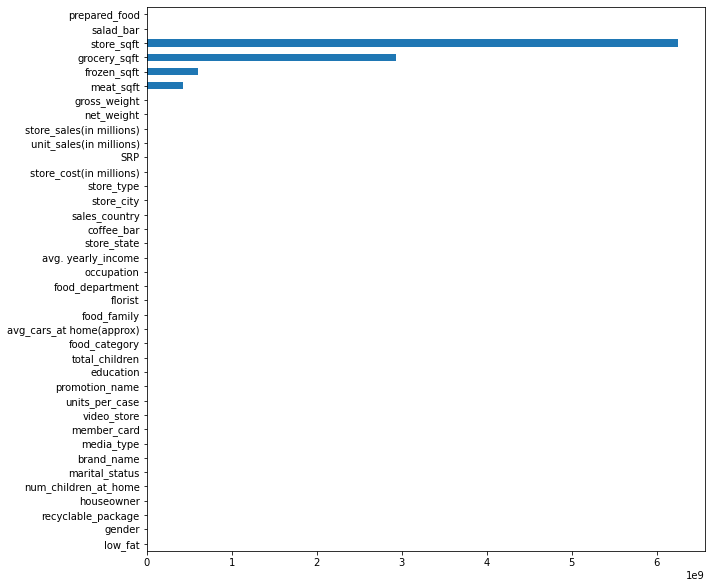

In [47]:
series_of_vif=pd.Series(vif_list, index=x_for_enc_o.columns)
plt.figure(figsize=(10,10))
series_of_vif.sort_values().plot(kind = 'barh')

## Forward Feature Selection

In [48]:
knn_model = KNeighborsRegressor()

sfs = SequentialFeatureSelector(knn_model, n_features_to_select = 17, direction='forward', cv=5)

sfs.fit(x_without_enc_col,y)

arr = sfs.get_support()
s3 = pd.Series(arr, index=x_without_enc_col.columns)


selected_features = sfs.get_feature_names_out()
selected_features

array(['store_cost(in millions)', 'unit_sales(in millions)',
       'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'SRP', 'recyclable_package', 'low_fat',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist'], dtype=object)

In [49]:
Dt_model = DecisionTreeRegressor()

sfs = SequentialFeatureSelector(Dt_model, n_features_to_select = 17, direction='forward', cv=5)

sfs.fit(x_without_enc_col,y)

arr = sfs.get_support()
s3 = pd.Series(arr, index=x_without_enc_col.columns)


selected_features = sfs.get_feature_names_out()
selected_features

array(['unit_sales(in millions)', 'total_children',
       'avg_cars_at home(approx)', 'num_children_at_home', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype=object)

In [50]:
Dt_model = DecisionTreeRegressor()

sfs = SequentialFeatureSelector(Dt_model, n_features_to_select = 30, direction='forward', cv=5,n_jobs=-1)

sfs.fit(x_for_enc_o,y)

arr = sfs.get_support()
s3 = pd.Series(arr, index=x_for_enc_o.columns)


selected_features = sfs.get_feature_names_out()
selected_features

array(['food_family', 'unit_sales(in millions)', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'total_children',
       'education', 'member_card', 'occupation', 'houseowner',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'net_weight', 'recyclable_package',
       'low_fat', 'store_type', 'store_city', 'store_state', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist',
       'media_type'], dtype=object)

Features we have to remove 

In [51]:
less_imp_feature_by_annova

['recyclable_package', 'units_per_case']

In [52]:
less_imp_feature_by_IG_gain

['brand_name',
 'SRP',
 'store_cost(in millions)',
 'food_category',
 'units_per_case',
 'store_sales(in millions)',
 'net_weight',
 'gross_weight',
 'food_department',
 'low_fat',
 'recyclable_package',
 'food_family']

In [53]:
less_imp_feature_by_DTfeature_imp

['total_children',
 'education',
 'avg_cars_at home(approx)',
 'occupation',
 'member_card',
 'brand_name',
 'num_children_at_home',
 'SRP',
 'store_cost(in millions)',
 'gender',
 'food_category',
 'units_per_case',
 'store_sales(in millions)',
 'net_weight',
 'houseowner',
 'gross_weight',
 'unit_sales(in millions)',
 'food_department',
 'marital_status',
 'low_fat',
 'recyclable_package',
 'food_family']

In [54]:
less_imp_feature_by_rffeature_imp

['total_children',
 'education',
 'avg_cars_at home(approx)',
 'occupation',
 'member_card',
 'brand_name',
 'num_children_at_home',
 'SRP',
 'store_cost(in millions)',
 'gender',
 'food_category',
 'units_per_case',
 'store_sales(in millions)',
 'net_weight',
 'houseowner',
 'gross_weight',
 'unit_sales(in millions)',
 'food_department',
 'marital_status',
 'low_fat',
 'recyclable_package',
 'food_family']

In [57]:
drop_features=['units_per_case','brand_name','food_department','food_family','occupation',
              "store_sales(in millions)",'net_weight','gross_weight','num_children_at_home','gross_weight',"SRP",'recyclable_package']

## Feature Engineering

In [79]:
df4

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,1,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,1,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,0,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,1,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,1,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,1,1,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,0,1,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,1,0,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,0,0,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [80]:
df4=df4.drop(columns=['units_per_case','brand_name','food_department','food_family','occupation',
              "store_sales(in millions)",'net_weight','gross_weight','num_children_at_home','gross_weight',"SRP",'recyclable_package'],axis=1)

In [81]:
df4

,food_category,store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,2.7232,4.0,Bag Stuffers,USA,1,1,1.0,0,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,2.5944,3.0,Cash Register Lottery,USA,1,0,0.0,3,2,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,1.3616,2.0,High Roller Savings,USA,0,1,4.0,0,0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,1.1776,2.0,Cash Register Lottery,USA,1,1,2.0,1,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,1.4280,3.0,Double Down Sale,USA,1,0,0.0,0,1,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,1.3248,1.0,You Save Days,USA,1,1,1.0,0,0,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,0.4960,1.0,Price Cutters,USA,0,1,2.0,1,1,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,2.5392,2.0,Weekend Markdown,USA,1,0,1.0,1,1,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,2.5668,3.0,Sales Days,Canada,0,0,2.0,3,1,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


### One Hot Encoding

In [82]:
df_label_one_hot=df4

### media_type

In [83]:
df_label_one_hot["media_type"].unique()

array(['Daily Paper, Radio', 'In-Store Coupon', 'Radio', 'Daily Paper',
       'Product Attachment', 'Sunday Paper, Radio',
       'Sunday Paper, Radio, TV', 'Sunday Paper', 'Street Handout', 'TV',
       'Bulk Mail', 'Cash Register Handout', 'Daily Paper, Radio, TV'],
      dtype=object)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  int64  
 9   gender                    60428 non-null  int64  
 10  total_children            60428 non-null  float64
 11  education                 60428 non-null  int64  
 12  member_card               60428 non-null  int64  
 13  occupation                60428 non-null  int64  
 14  houseo

In [85]:
df_label_one_hot["media_type"].unique().tolist()

['Daily Paper, Radio',
 'In-Store Coupon',
 'Radio',
 'Daily Paper',
 'Product Attachment',
 'Sunday Paper, Radio',
 'Sunday Paper, Radio, TV',
 'Sunday Paper',
 'Street Handout',
 'TV',
 'Bulk Mail',
 'Cash Register Handout',
 'Daily Paper, Radio, TV']

In [86]:
lst_media_type_columns=[]
for i in df_label_one_hot["media_type"].unique().tolist():
    if " "in i:
        a=i.replace(" ","_")
        lst_media_type_columns.append(a)
    else:
        lst_media_type_columns.append(i)
print(lst_media_type_columns)

['Daily_Paper,_Radio', 'In-Store_Coupon', 'Radio', 'Daily_Paper', 'Product_Attachment', 'Sunday_Paper,_Radio', 'Sunday_Paper,_Radio,_TV', 'Sunday_Paper', 'Street_Handout', 'TV', 'Bulk_Mail', 'Cash_Register_Handout', 'Daily_Paper,_Radio,_TV']


In [87]:
# lst=['Daily_Paper,_Radio', 'In-Store_Coupon', 'Radio', 'Daily_Paper',
#        'Product_Attachment', 'Sunday_Paper,_Radio',
#        'Sunday_Paper,_Radio,_TV', 'Sunday_Paper', 'Street_Handout', 'TV',
#        'Bulk_Mail', 'Cash_Register_Handout', 'Daily_Paper,_Radio,_TV']

In [88]:
m=1
dict01={}
for i in df_label_one_hot["media_type"].unique():
    n=1
    for j in lst_media_type_columns:
        if m==n:
            dict02={f"{i}":j}
            dict01.update(dict02)
            dict02.clear()
        n=n+1
    m=m+1
        
print(dict01)

{'Daily Paper, Radio': 'Daily_Paper,_Radio', 'In-Store Coupon': 'In-Store_Coupon', 'Radio': 'Radio', 'Daily Paper': 'Daily_Paper', 'Product Attachment': 'Product_Attachment', 'Sunday Paper, Radio': 'Sunday_Paper,_Radio', 'Sunday Paper, Radio, TV': 'Sunday_Paper,_Radio,_TV', 'Sunday Paper': 'Sunday_Paper', 'Street Handout': 'Street_Handout', 'TV': 'TV', 'Bulk Mail': 'Bulk_Mail', 'Cash Register Handout': 'Cash_Register_Handout', 'Daily Paper, Radio, TV': 'Daily_Paper,_Radio,_TV'}


In [89]:
df_label_one_hot["media_type"].replace(dict01,inplace=True)

In [90]:
df_label_one_hot["media_type"].unique()

array(['Daily_Paper,_Radio', 'In-Store_Coupon', 'Radio', 'Daily_Paper',
       'Product_Attachment', 'Sunday_Paper,_Radio',
       'Sunday_Paper,_Radio,_TV', 'Sunday_Paper', 'Street_Handout', 'TV',
       'Bulk_Mail', 'Cash_Register_Handout', 'Daily_Paper,_Radio,_TV'],
      dtype=object)

In [91]:
df_label_one_hot=pd.get_dummies(df_label_one_hot,columns=["media_type"])

In [92]:
drop_features=['units_per_case','brand_name','food_department','food_family','occupation',
              "store_sales(in millions)",'net_weight','gross_weight','num_children_at_home','gross_weight',"SRP",'recyclable_package']

#### One Hot Encoded Columns: food_category, promotion_name, sales_country, store_city, store_state, houseowner

In [93]:
df_label_one_hot=pd.get_dummies(df_label_one_hot,columns=["food_category","promotion_name",
                                                          "sales_country","store_state","store_city","houseowner"])

In [94]:
df_label_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Columns: 162 entries, store_cost(in millions) to houseowner_Y
dtypes: float64(15), int64(6), uint8(141)
memory usage: 17.8 MB


In [95]:
#pd.set_option('display.max_columns',310)

In [96]:
df_label_one_hot.info(memory_usage='deep',verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 162 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    store_cost(in millions)                 float64
 1    unit_sales(in millions)                 float64
 2    marital_status                          int64  
 3    gender                                  int64  
 4    total_children                          float64
 5    education                               int64  
 6    member_card                             int64  
 7    avg_cars_at home(approx)                float64
 8    avg. yearly_income                      int64  
 9    low_fat                                 float64
 10   store_type                              int64  
 11   store_sqft                              float64
 12   grocery_sqft                            float64
 13   frozen_sqft                             float64
 14   meat_sqft           

In [97]:
df_label_one_hot.to_csv("clean csv project group.csv")  